In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('diabetes2.csv')
x = dataset.iloc[:,0:-1].values.astype(float)
y = dataset.iloc[:,-1].values.astype(float)


In [ ]:
yy = y.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
StdS_X = StandardScaler()
StdS_y = StandardScaler()
X = StdS_X.fit_transform(x)
Y = StdS_y.fit_transform(yy)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(X, Y, test_size=0.3)
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=0.5)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from keras.layers import Dropout
from keras import regularizers

model = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(8,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

model.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

hist=model.fit(
    x_train, y_train,
    batch_size=32, 
    epochs=120,
    validation_data=(x_val, y_val)
)

In [ ]:
model.evaluate(x_test, y_test)[1]

1/1 [==============================] - 0s 21ms/step - loss: -886123626758144.0000 - accuracy: 0.0000e+00


0.0

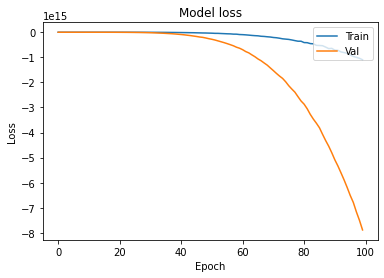

In [ ]:
import matplotlib.pyplot as plt


plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

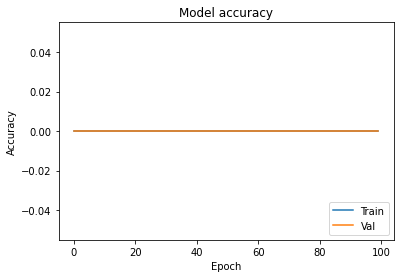

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:

# Reading the cleaned numeric car prices data
import pandas as pd
import numpy as np
 
# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)
 
CarPricesDataNumeric=pd.read_csv('main_tfm_ML.csv')
CarPricesDataNumeric.head()

,Gel(kPa),RMS Traction(Pa),Net Contractile Moment (PJ),Total Strain Energy(PJ),Max Force(nN),Area(um2),Prestress(Pa)
0,8.5,99.08633,-0.38319,0.00285,7.11858,804.1486,83.58380
1,8.5,1413.06600,0.26449,0.53939,160.82640,912.1742,295.60130
2,8.5,448.95790,0.10495,0.03287,23.04144,701.4072,85.39752
3,8.5,692.09090,-0.03357,0.04988,5.00578,450.7972,53.76590
4,8.5,249.79710,-0.23914,0.00547,5.59892,332.9857,85.84090


In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable=['Prestress(Pa)']
Predictors=['Gel(kPa)', 'RMS Traction(Pa)', 'Net Contractile Moment (PJ)', 'Total Strain Energy(PJ)', 'Max Force(nN)', 'Area(um2)']

X=CarPricesDataNumeric[Predictors].values
y=CarPricesDataNumeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(58, 6)
(58, 1)
(15, 6)
(15, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=1024, input_dim=6, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=1024, kernel_initializer='normal', activation='relu'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 4, epochs = 12, verbose=1)

In [ ]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)


######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

In [ ]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [ ]:
# Fitting the ANN to the Training set
#model.fit(X_train, y_train ,batch_size = 15, epochs = 5, verbose=0)
 
# Generating Predictions on testing data
Predictions=model.predict(X_test)
 
# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)
 
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Prestress']=y_test_orig
TestingData['PredictedPrestress']=Predictions
TestingData.head()

In [ ]:
# Computing the absolute percent error
APE=100*(abs(TestingData['Prestress']-TestingData['PredictedPrestress'])/TestingData['Prestress'])
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

In [ ]:
# Function to generate Deep ANN model 
def make_regression_ann(Optimizer_trial):
    from keras.models import Sequential
    from keras.layers import Dense
    
    model = Sequential()
    model.add(Dense(units=5, input_dim=6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model

###########################################
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

# Listing all the parameters to try
Parameter_Trials={'batch_size':[10,20,30],
                      'epochs':[10,20],
                    'Optimizer_trial':['adam', 'rmsprop']
                 }

# Creating the regression ANN model
RegModel=KerasRegressor(make_regression_ann, verbose=0)

###########################################
from sklearn.metrics import make_scorer

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

#########################################
# Creating the Grid search space
# See different scoring methods by using sklearn.metrics.SCORERS.keys()
grid_search=GridSearchCV(estimator=RegModel, 
                         param_grid=Parameter_Trials, 
                         scoring=custom_Scoring, 
                         cv=5)

#########################################
# Measuring how much time it took to find the best params
import time
StartTime=time.time()

# Running Grid Search for different paramenters
grid_search.fit(X,y, verbose=1)

EndTime=time.time()
print("########## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')

print('### Printing Best parameters ###')
grid_search.best_params_

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Neural Net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
df = pd.read_csv('/content/main_tfm_ML.csv')
df.info()

# drop any rows with missing values
df.dropna(axis=0, inplace=True)
df.info()

# convert categorical variable into dummy variables
#df = pd.get_dummies(df, columns=['ocean_proximity'])
#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gel(kPa)                     73 non-null     float64
 1   RMS Traction(Pa)             73 non-null     float64
 2   Net Contractile Moment (PJ)  73 non-null     float64
 3   Total Strain Energy(PJ)      73 non-null     float64
 4   Max Force(nN)                73 non-null     float64
 5   Area(um2)                    73 non-null     float64
 6   Prestress(Pa)                73 non-null     float64
dtypes: float64(7)
memory usage: 4.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 72
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gel(kPa)                     73 non-null     float64
 1   RMS Traction(Pa)             73 non-null     float64
 2

In [ ]:
from keras.backend import reshape
# our target variable is 'Prestress'
y = df['RMS Traction(Pa)']
X = df.drop('RMS Traction(Pa)', axis=1)
print(X.shape, y.shape)

# convert to numpy array
X = np.array(X)
y = np.array(y)

#Standarzing the variable
y = y.reshape(-1,1)

StdS_X = StandardScaler()
StdS_y = StandardScaler()
X = StdS_X.fit_transform(X)
y = StdS_y.fit_transform(y)



# split into X_train and X_test
# always split into X_train, X_test first THEN apply minmax scaler
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123)



print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# use minMax scaler
#min_max_scaler = MinMaxScaler()
#X_train = min_max_scaler.fit_transform(X_train)
#X_test = min_max_scaler.transform(X_test)




(73, 6) (73,)
(58, 6) (15, 6) (58, 1) (15, 1)


In [ ]:
from keras.layers import Dense, Dropout

# Insert the dropout layer
model = Sequential()
model.add(Dense(1024, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(1)) # output node
model.summary() # see what your model looks like

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=30,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=4,
                    verbose=1)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1024)              7168      
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 dense_15 (Dense)            (None, 512)               524800    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 1)                

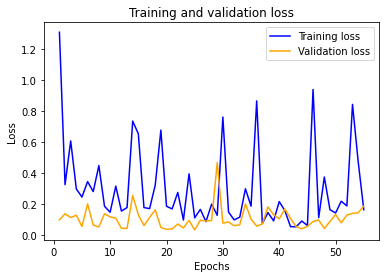

In [ ]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'blue', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 18ms/step


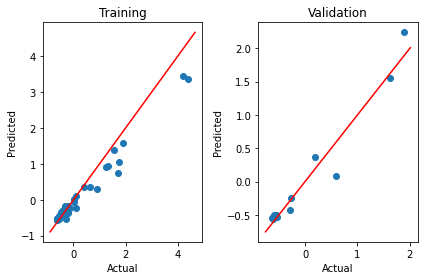

In [ ]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [ ]:
# metrics
pred = model.predict(X_test)
pred

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test

2/2 [==============================] - 0s 8ms/step
0.15650890764944914
0.11948928096362979


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   RMS traction(Pa)             73 non-null     float64
 1   Net Contractile Moment (PJ)  73 non-null     float64
 2   Total Strain Energy(PJ)      73 non-null     float64
 3   Max Force(nN)                73 non-null     float64
 4   Area (um2)                   73 non-null     float64
 5   Prestress(Pa)                73 non-null     float64
 6   Gel (kPa)                    73 non-null     float64
dtypes: float64(7)
memory usage: 4.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 72
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   RMS traction(Pa)             73 non-null     float64
 1   Net Contractile Moment (PJ)  73 non-null     float64
 2

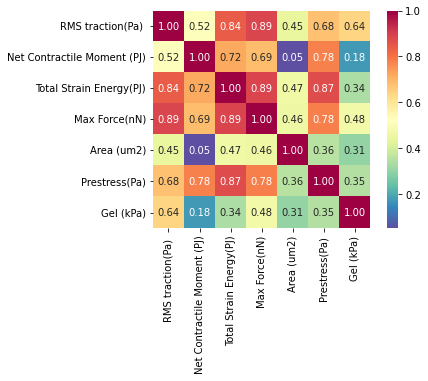

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import pandas as pd

df = pd.read_csv('/content/main_tfm_ML (1).csv')
df.info()

# drop any rows with missing values
df.dropna(axis=0, inplace=True)
df.info()


corrmat = df.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r")
plt.show()

Random Forest Regressor

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/main_tfm_ML.csv')
#df.info()

# drop any rows with missing values
df.dropna(axis=0, inplace=True)
#df.info()

# convert categorical variable into dummy variables
#df = pd.get_dummies(df, columns=['ocean_proximity'])
#df.info()

from keras.backend import reshape
# our target variable is 'Prestress'
y = df['RMS Traction(Pa)']
X = df.drop('RMS Traction(Pa)', axis=1)
#print(X.shape, y.shape)


# convert to numpy array
X = np.array(X)
y = np.array(y)

#Standarzing the variable
#y = y.reshape(-1,1)

StdS_X = StandardScaler()
#StdS_y = StandardScaler()
X = StdS_X.fit_transform(X)
#y = StdS_y.fit_transform(y)



# split into X_train and X_test
# always split into X_train, X_test first THEN apply minmax scaler
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)



#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# use minMax scaler
#min_max_scaler = MinMaxScaler()
#X_train = min_max_scaler.fit_transform(X_train)
#X_test = min_max_scaler.transform(X_test)

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);



# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', np.mean(errors))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 4), '%.')


# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
feature_list = ['Gel(kPa)', 'Net Contractile Moment (PJ)', 'Total Strain Energy(PJ)', 'Max Force(nN)', 'Area(um2)', 'Prestress(Pa)']
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')



# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

Mean Absolute Error: 45.52737417399964
Accuracy: 71.74 %.


SVR

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/main_tfm_ML.csv')
#df.info()

# drop any rows with missing values
df.dropna(axis=0, inplace=True)
#df.info()

# convert categorical variable into dummy variables
#df = pd.get_dummies(df, columns=['ocean_proximity'])
#df.info()

from keras.backend import reshape
y = df['Prestress(Pa)']
X = df.drop('Prestress(Pa)', axis=1)
#print(X.shape, y.shape)


# convert to numpy array
X = np.array(X)
y = np.array(y)

#Standarzing the variables
#y = y.reshape(-1,1)

StdS_X = StandardScaler()
StdS_y = StandardScaler()
X = StdS_X.fit_transform(X)
#y = StdS_y.fit_transform(y)



# split into X_train and X_test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)



#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

from sklearn.svm import SVR
regrassor = SVR(kernel = 'rbf')
regrassor.fit(X_train, y_train)


y_pred = regrassor.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)

y_test = y_test.flatten()
df = pd.DataFrame({'Predicted value': y_pred, 'Real Value': y_test})
df


KNN

train_mse: 76.08881145530361
test_mse: 205.32059876968108


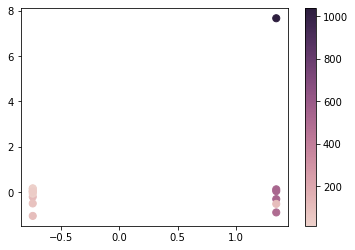

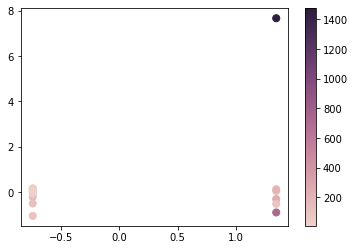

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/main_tfm_ML.csv')
#df.info()

# drop any rows with missing values
df.dropna(axis=0, inplace=True)
#df.info()

# convert categorical variable into dummy variables
#df = pd.get_dummies(df, columns=['ocean_proximity'])
#df.info()

from keras.backend import reshape
y = df['RMS Traction(Pa)']
X = df.drop('RMS Traction(Pa)', axis=1)
#print(X.shape, y.shape)


# convert to numpy array
X = np.array(X)
y = np.array(y)

#Standarzing the variables
#y = y.reshape(-1,1)

StdS_X = StandardScaler()
StdS_y = StandardScaler()
X = StdS_X.fit_transform(X)
#y = StdS_y.fit_transform(y)



# split into X_train and X_test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)



#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=2)
knn_model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse_train = mean_squared_error(y_train, train_preds)
rmse_train= sqrt(mse_train)
print('train_mse:', rmse_train)


test_preds = knn_model.predict(X_test)
mse_test = mean_squared_error(y_test, test_preds)
rmse_test = sqrt(mse_test)
print('test_mse:',rmse_test)

#plotting the fit on the model

import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
gridsearch.best_params_

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/base.py", line 705, in score
    y_pred = self.predict(X)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_regression.py", line 229, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py", line 727, in kneighbors
    raise ValueError(
ValueError: Expected n_neighbors <= n_samples,  but n_samples = 46, n_

{'n_neighbors': 3}

In [ ]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
print(train_rmse)
print(test_rmse)

193.15121012825924
697.9134331124669


In [ ]:
parameters = {"n_neighbors": range(1, 50),    "weights": ["uniform", "distance"], }
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})
gridsearch.best_params_
{'n_neighbors': 14, 'weights': 'distance'}
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

In [ ]:
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsRegressor( n_neighbors=best_k, weights=best_weights)

from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)

test_preds_grid = bagging_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

NotFittedError: ignored

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 314.1649869746086
RMSE value for k=  2 is: 205.32059876968108
RMSE value for k=  3 is: 189.26308650290304
RMSE value for k=  4 is: 191.67848132682082
RMSE value for k=  5 is: 207.54408761846616
RMSE value for k=  6 is: 217.17959594274146
RMSE value for k=  7 is: 234.67864740203322
RMSE value for k=  8 is: 243.0558565878315
RMSE value for k=  9 is: 253.5401853327366
RMSE value for k=  10 is: 258.34161993917394
RMSE value for k=  11 is: 266.1711828634673
RMSE value for k=  12 is: 279.02855108706814
RMSE value for k=  13 is: 278.1923534758014
RMSE value for k=  14 is: 285.0263974621433
RMSE value for k=  15 is: 293.563605083889
RMSE value for k=  16 is: 296.20415658848646
RMSE value for k=  17 is: 301.2369365520184
RMSE value for k=  18 is: 304.8527339493279
RMSE value for k=  19 is: 309.0909266243003
RMSE value for k=  20 is: 312.9583780061654


CNN: VGG16

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPool1D , Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd


import tensorflow as tf



# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/main_tfm_ML.csv')
#df.info()

# drop any rows with missing values
df.dropna(axis=0, inplace=True)
#df.info()

# convert categorical variable into dummy variables
#df = pd.get_dummies(df, columns=['ocean_proximity'])
#df.info()

from keras.backend import reshape
y = df['Prestress(Pa)']
X = df.drop('Prestress(Pa)', axis=1)
#print(X.shape, y.shape)


# convert to numpy array
X = np.array(X)
y = np.array(y)

#Standarzing the variables
y = y.reshape(-1,1)

StdS_X = StandardScaler()
StdS_y = StandardScaler()
X = StdS_X.fit_transform(X)
y = StdS_y.fit_transform(y)



# split into X_train and X_test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)



model = Sequential()
model.add(Conv1D(input_shape=(6,1),filters=64,kernel_size=3,padding="same", activation="relu"))
model.add(Conv1D(filters=64,kernel_size=3,padding="same", activation="relu"))
model.add(MaxPool1D(pool_size=1,strides=2))
model.add(Conv1D(filters=128, kernel_size=3, padding="same", activation="relu"))
model.add(Conv1D(filters=128, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPool1D(pool_size=1,strides=2))
model.add(Conv1D(filters=256, kernel_size=3, padding="same", activation="relu"))
model.add(Conv1D(filters=256, kernel_size=3, padding="same", activation="relu"))
model.add(Conv1D(filters=256, kernel_size=3, padding="same", activation="relu"))
model.add(Conv1D(filters=256, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPool1D(pool_size=1,strides=2))
model.add(Conv1D(filters=512, kernel_size=3, padding="same", activation="relu"))
model.add(Conv1D(filters=512, kernel_size=3, padding="same", activation="relu"))
model.add(Conv1D(filters=512, kernel_size=3, padding="same", activation="relu"))
model.add(Conv1D(filters=512, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPool1D(pool_size=1,strides=2))
model.add(Conv1D(filters=512, kernel_size=3, padding="same", activation="relu"))
model.add(Conv1D(filters=512, kernel_size=3, padding="same", activation="relu"))
model.add(Conv1D(filters=512, kernel_size=3, padding="same", activation="relu"))
model.add(Conv1D(filters=512, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPool1D(pool_size=1,strides=2))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1))


#from keras.callbacks import ModelCheckpoint, EarlyStopping
#checkpoint = ModelCheckpoint("vgg19_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)
#early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

opt = Adam(learning_rate=0.0001)

model.compile(optimizer=opt, loss = 'mse', metrics=['mae'])
hist = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test))
#hist = model.fit(train_features, train_labels, validation_data= (test_features, test_labels),epochs=500,callbacks=early)



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/main_tfm_ML.csv')
#df.info()

# drop any rows with missing values
#df.dropna(axis=0, inplace=True)
#df.info()

# convert categorical variable into dummy variables
#df = pd.get_dummies(df, columns=['ocean_proximity'])
#df.info()

from keras.backend import reshape
# our target variable is 'Prestress'
y = df['RMS Traction(Pa)']
X = df.drop('RMS Traction(Pa)', axis=1)
#print(X.shape, y.shape)


# convert to numpy array
X = np.array(X)
y = np.array(y)

#Standarzing the variable
y = y.reshape(-1,1)

StdS_X = StandardScaler()
StdS_y = StandardScaler()
X = StdS_X.fit_transform(X)
y = StdS_y.fit_transform(y)
y = y.reshape(1,-1)

print(y)


[[-0.31969864  4.20764188  0.88579013  1.72350925  0.19957803  4.41819748
   1.32526974  1.55987678  1.62378183  1.88472021 -0.5261325  -0.4305824
  -0.31302925 -0.20308518 -0.31036104 -0.28794864 -0.54452605 -0.45220623
  -0.15319719 -0.19528936 -0.25741067 -0.23172295 -0.32940645 -0.592201
  -0.61888622 -0.42145498 -0.60510198 -0.56211101 -0.53511497 -0.60596222
  -0.62723416 -0.62677484 -0.39557483 -0.2014148  -0.31563475 -0.46484342
  -0.36939362  1.88385297  0.41093023  0.03795498 -0.20426355  0.64291006
   0.59492812  0.10701832  0.08278599  0.03432754  1.25227265  1.73556063
  -0.61565336 -0.59076608 -0.59574998 -0.60732882 -0.61766754 -0.53095206
  -0.29875516 -0.63164804 -0.60426517 -0.6381302  -0.62841773 -0.57119826
  -0.64296512 -0.54831964 -0.53518519 -0.54517529 -0.29442001 -0.27118516
  -0.21081796 -0.38514611 -0.28085673 -0.50538993 -0.62611054 -0.57751361
  -0.55672625]]
